In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [8]:
data = 'TRs_annotated_cleaned.csv'
df = pd.read_csv(data)
df['label'].sum()

5633

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
col_names = df.columns

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

In [ ]:
df.isnull().sum()

In [ ]:
# changing categorial variables into one-hot
# ['id', 'location', 'region', 'gene_type', 'tissue_simple']
df.drop(['id'], axis=1, inplace=True)
df.drop(['location'], axis=1, inplace=True)
df.drop(['region'], axis=1, inplace=True)
df.drop(['tissue_simple'], axis=1, inplace=True)

one_hot_gene_type = pd.get_dummies(df.gene_type, prefix="gene_type", drop_first=True)
new_df = pd.concat([df[numerical], one_hot_gene_type], axis=1)
new_df.drop(['gene_type_intergenic'], axis=1, inplace=True)


In [ ]:
pd.set_option('display.max_columns', None)
new_df.head()

In [ ]:
X = new_df.drop(['label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [ ]:
param_grid_3 = {
    'alpha': [0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}
elastic_net = ElasticNet(random_state=42)

grid_search_3 = GridSearchCV(estimator=elastic_net, param_grid=param_grid_3, cv=5, scoring='roc_auc')
grid_search_3.fit(X_train, y_train)
best_model_3 = grid_search_3.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.749e-01, tolerance: 2.642e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.518e-01, tolerance: 2.660e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.645e-01, tolerance: 2.668e

KeyboardInterrupt: 

In [ ]:
# print params
best_params_3 = grid_search_3.best_params_
print("Best Parameters:", best_params_3)

y_pred_prob_3 = best_model_3.predict(X_test)

# Compute the ROC AUC score
roc_auc_3 = roc_auc_score(y_test, y_pred_prob_3)
print("ROC AUC Score:", roc_auc_3)


Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
ROC AUC Score: 0.7763611235395609


In [ ]:
param_grid_2 = {
    'n_estimators': [500, 1500],
    'max_depth': [3, 5, 8,],
}
rf_classifier = RandomForestClassifier(random_state=42)

grid_search_2 = GridSearchCV(verbose=2, estimator=rf_classifier, param_grid=param_grid_2, cv=5, scoring='roc_auc')
grid_search_2.fit(X_train, y_train)
best_model_2 = grid_search_2.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................max_depth=3, n_estimators=500; total time=   6.2s
[CV] END ......................max_depth=3, n_estimators=500; total time=   5.3s
[CV] END ......................max_depth=3, n_estimators=500; total time=   6.2s
[CV] END ......................max_depth=3, n_estimators=500; total time=   5.4s
[CV] END ......................max_depth=3, n_estimators=500; total time=   6.2s
[CV] END .....................max_depth=3, n_estimators=1500; total time=  16.7s
[CV] END .....................max_depth=3, n_estimators=1500; total time=  17.2s
[CV] END .....................max_depth=3, n_estimators=1500; total time=  17.7s
[CV] END .....................max_depth=3, n_estimators=1500; total time=  17.8s
[CV] END .....................max_depth=3, n_estimators=1500; total time=  17.7s
[CV] END ......................max_depth=5, n_estimators=500; total time=   7.4s
[CV] END ......................max_depth=5, n_est

In [ ]:
# print params
best_params_2 = grid_search_2.best_params_
print("Best Parameters:", best_params_2)

y_pred_prob_2 = best_model_2.predict(X_test)

# Compute the ROC AUC score
roc_auc_2 = roc_auc_score(y_test, y_pred_prob_2)
print("ROC AUC Score:", roc_auc_2)
b = best_model_2.predict(X_train)
a = roc_auc_score(y_train, b)
print(a)

In [ ]:
param_grid = {
    'max_depth': [9, 10, 11],
    'learning_rate': [0.25, 0.3],
    'min_child_weight': [1],
    'subsample': [1],
    'alpha': [0.5, 1, 1.5],
    'lambda': [0.01, 0.075]
}
xgb_classifier = xgb.XGBClassifier(verbosity=2, random_state=42)

grid_search = GridSearchCV(verbose=2, estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END alpha=0.5, lambda=0.01, learning_rate=0.25, max_depth=9, min_child_weight=1, subsample=1; total time=   1.4s
[CV] END alpha=0.5, lambda=0.01, learning_rate=0.25, max_depth=9, min_child_weight=1, subsample=1; total time=   1.4s
[CV] END alpha=0.5, lambda=0.01, learning_rate=0.25, max_depth=9, min_child_weight=1, subsample=1; total time=   1.4s
[CV] END alpha=0.5, lambda=0.01, learning_rate=0.25, max_depth=9, min_child_weight=1, subsample=1; total time=   1.4s
[CV] END alpha=0.5, lambda=0.01, learning_rate=0.25, max_depth=9, min_child_weight=1, subsample=1; total time=   1.3s
[CV] END alpha=0.5, lambda=0.01, learning_rate=0.25, max_depth=10, min_child_weight=1, subsample=1; total time=   3.2s
[CV] END alpha=0.5, lambda=0.01, learning_rate=0.25, max_depth=10, min_child_weight=1, subsample=1; total time=   1.7s
[CV] END alpha=0.5, lambda=0.01, learning_rate=0.25, max_depth=10, min_child_weight=1, subsample=1; total time

In [ ]:
# print params
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
y_pred_prob = best_model.predict(X_test)

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)
b = best_model.predict(X_train)
a = roc_auc_score(y_train, b)
print(a)

Best Parameters: {'alpha': 1, 'lambda': 0.075, 'learning_rate': 0.25, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1}
ROC AUC Score: 0.7586409725239971
0.9090835344467507


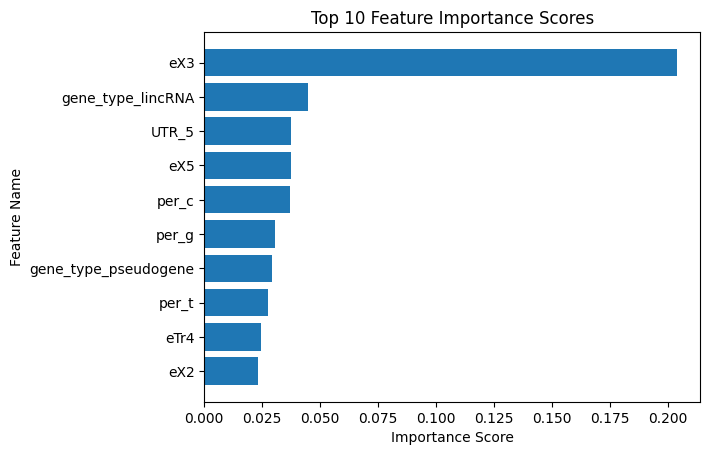

Feature gene_distance: 0.011513707228004932
Feature gerp: 0.01617870107293129
Feature TAD: 0.010622951202094555
Feature eSTR: 0.010852300561964512
Feature opReg: 0.015645548701286316
Feature promoter: 0.010979133658111095
Feature UTR_3: 0.009870745241641998
Feature UTR_5: 0.0375036746263504
Feature loeuf: 0.009839314967393875
Feature pLi: 0.00939727108925581
Feature RAD21: 0.01148385088890791
Feature SMC3: 0.009402121417224407
Feature per_g: 0.030360015109181404
Feature per_c: 0.03679206594824791
Feature per_a: 0.020554522052407265
Feature per_t: 0.027542460709810257
Feature gc_content: 0.014236066490411758
Feature eSh0: 0.016276899725198746
Feature eSh1: 0.01537429727613926
Feature eSh2: 0.014072242192924023
Feature eSh3: 0.013254516758024693
Feature eSh4: 0.011474917642772198
Feature eSh5: 0.01402287557721138
Feature eTr0: 0.0
Feature eTr2: 0.022636502981185913
Feature eTr3: 0.009595692157745361
Feature eTr4: 0.02435222826898098
Feature eTr5: 0.01033337414264679
Feature eH: 0.0
Featu

In [ ]:
importance_scores = best_model.feature_importances_

top_indices = sorted(range(len(importance_scores)), key=lambda i: importance_scores[i], reverse=True)[:10]

top_scores = [importance_scores[i] for i in top_indices]
top_feature_names = [X.columns[i] for i in top_indices]

plt.barh(top_feature_names, top_scores)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to have the longest bar at the top
plt.show()

# print(X.head())

# Print feature importance scores top 10, add names, flix x and y, sort by longest bar
for i, score in enumerate(importance_scores):
    print(f"Feature {X.columns[i]}: {score}")


In [ ]:
importance_scores = best_model_3.feature_importances_

top_indices = sorted(range(len(importance_scores)), key=lambda i: importance_scores[i], reverse=True)[:10]

top_scores = [importance_scores[i] for i in top_indices]
top_feature_names = [X.columns[i] for i in top_indices]

plt.barh(top_feature_names, top_scores)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to have the longest bar at the top
plt.show()

# print(X.head())

# Print feature importance scores top 10, add names, flix x and y, sort by longest bar
for i, score in enumerate(importance_scores):
    print(f"Feature {X.columns[i]}: {score}")